   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Grouped Data Summary (GDS):
                    Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm    

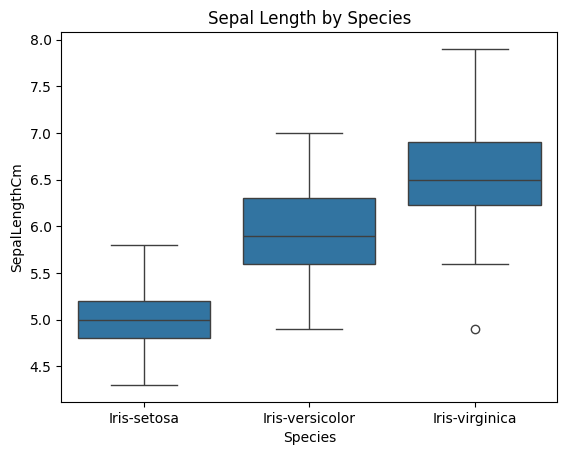

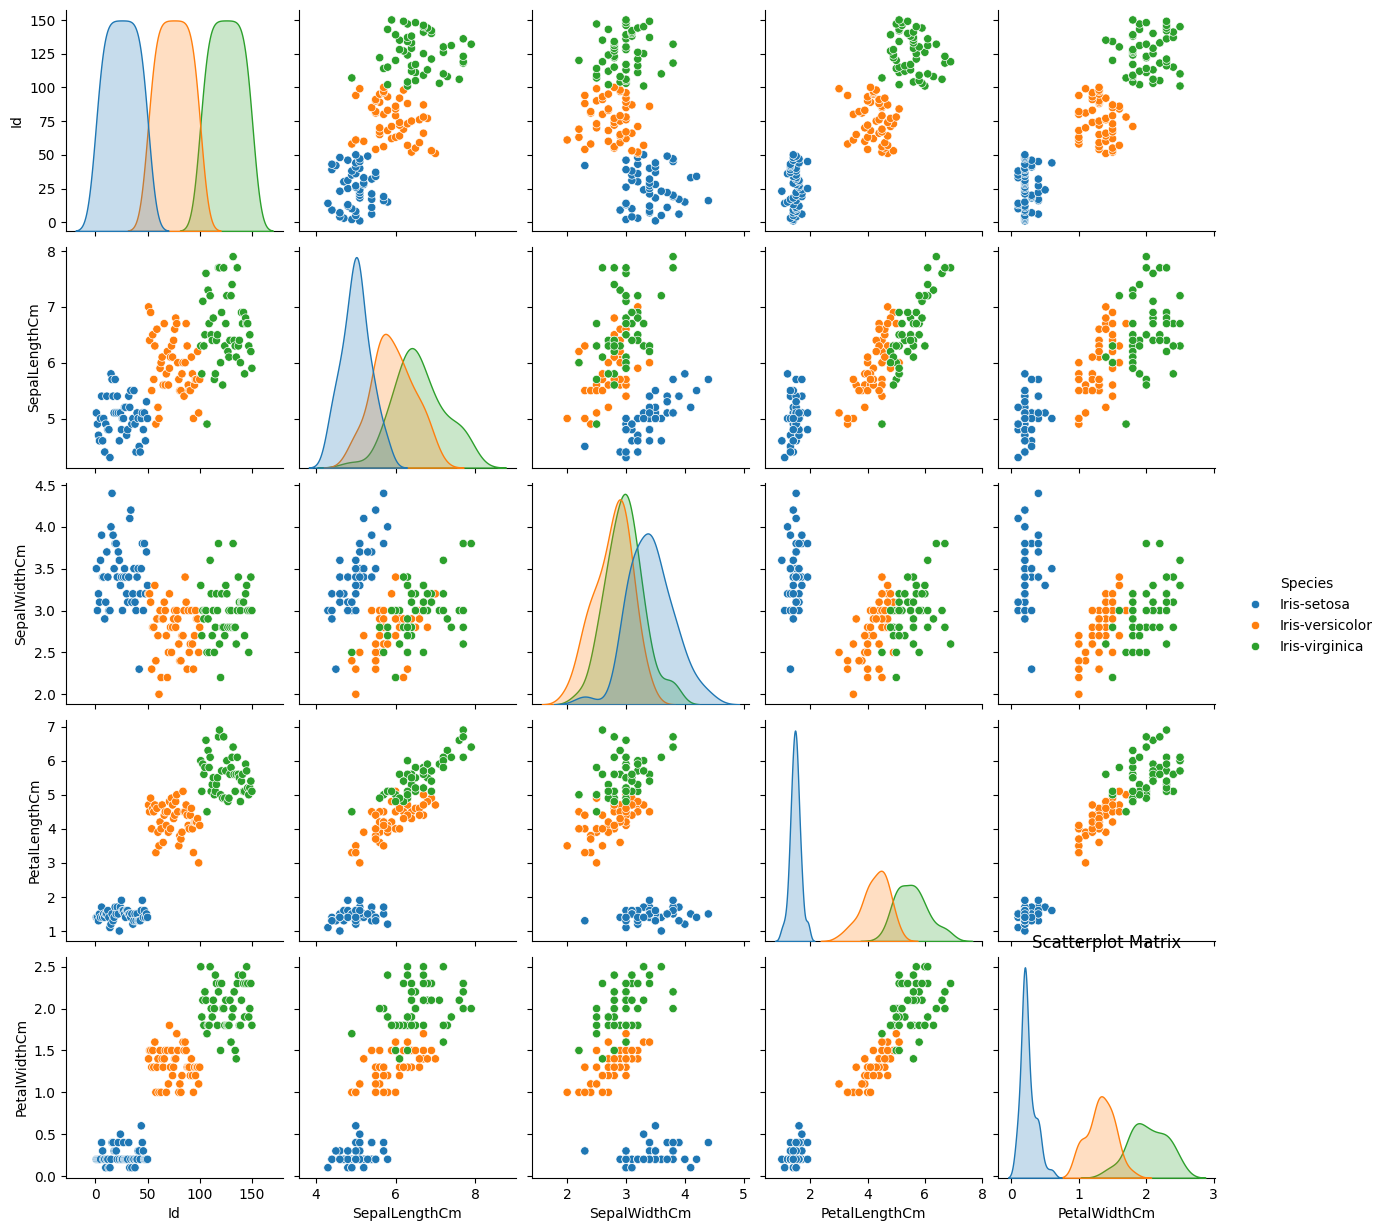

In [ ]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = pd.read_csv(r"/content/Iris.csv")

# Display the first few rows of the dataset
print(iris.head())

# Calculate Grouped Data Summary (GDS)
gds = iris.groupby('Species').describe()
print("\nGrouped Data Summary (GDS):\n", gds)

# Calculate Total Data Summary (TDS)
tds = iris.describe()
print("\nTotal Data Summary (TDS):\n", tds)

# Perform ANOVA
model = ols('SepalLengthCm ~ Species', data=iris).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:\n", anova_table)

# Perform t-test
setosa_sepal_length = iris[iris['Species'] == 'Iris-setosa']['SepalLengthCm']
versicolor_sepal_length = iris[iris['Species'] == 'Iris-versicolor']['SepalLengthCm']
t_statistic, p_value = stats.ttest_ind(setosa_sepal_length, versicolor_sepal_length, nan_policy='omit')
print("\nT-test (Sepal Length between setosa and versicolor):")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Perform z-test manually
setosa_sepal_width = iris[iris['Species'] == 'Iris-setosa']['SepalWidthCm']
virginica_sepal_width = iris[iris['Species'] == 'Iris-virginica']['SepalWidthCm']
if len(setosa_sepal_width) > 1 and len(virginica_sepal_width) > 1:  # Ensure at least 2 observations for each species
    mean1 = setosa_sepal_width.mean()
    mean2 = virginica_sepal_width.mean()
    std1 = setosa_sepal_width.std()
    std2 = virginica_sepal_width.std()
    n1 = len(setosa_sepal_width)
    n2 = len(virginica_sepal_width)

    # Calculate z-score
    z_statistic = (mean1 - mean2) / ((std1**2 / n1) + (std2**2 / n2))**0.5

    # Calculate p-value
    p_value_z = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

    print("\nZ-test (Sepal Width between setosa and virginica):")
    print("Z-statistic:", z_statistic)
    print("P-value:", p_value_z)
else:
    print("\nCannot perform z-test: At least one species has less than 2 observations.")

# Visualizations
# Boxplot for Sepal Length by Species
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
plt.title('Sepal Length by Species')
plt.show()

# Scatterplot Matrix
sns.pairplot(iris, hue='Species')
plt.title('Scatterplot Matrix')
plt.show()


Fail to reject the null hypothesis. There is no significant difference.
